In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('US_Accidents_Dec20.csv',header=0)

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [6]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [7]:
df.isnull().sum()

ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [9]:
percent_missing

ID                        0.000000
Source                    0.000000
TMC                      35.819240
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  64.180760
End_Lng                  64.180760
Distance(mi)              0.000000
Description               0.000047
Number                   63.506745
Street                    0.000000
Side                      0.000000
City                      0.003237
County                    0.000000
State                     0.000000
Zipcode                   0.030525
Country                   0.000000
Timezone                  0.109036
Airport_Code              0.212000
Weather_Timestamp         1.480057
Temperature(F)            2.124020
Wind_Chill(F)            44.795809
Humidity(%)               2.255548
Pressure(in)              1.804684
Visibility(mi)            2.331176
Wind_Direction      

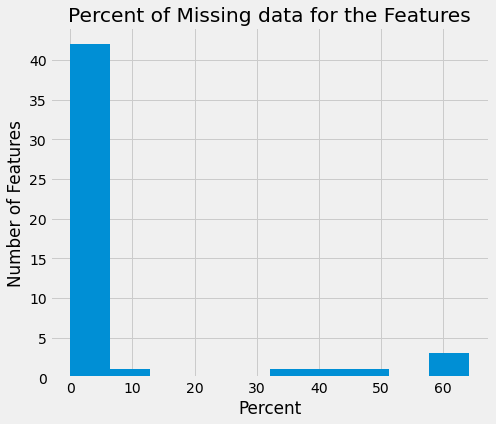

In [10]:

plt.figure(figsize=(7, 6))
plt.title('Percent of Missing data for the Features')
plt.hist(percent_missing)
plt.xlabel('Percent')
plt.ylabel('Number of Features')
plt.show()

In [11]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

In [12]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1, cmap = 'jet')
    plt.grid(False)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()
    


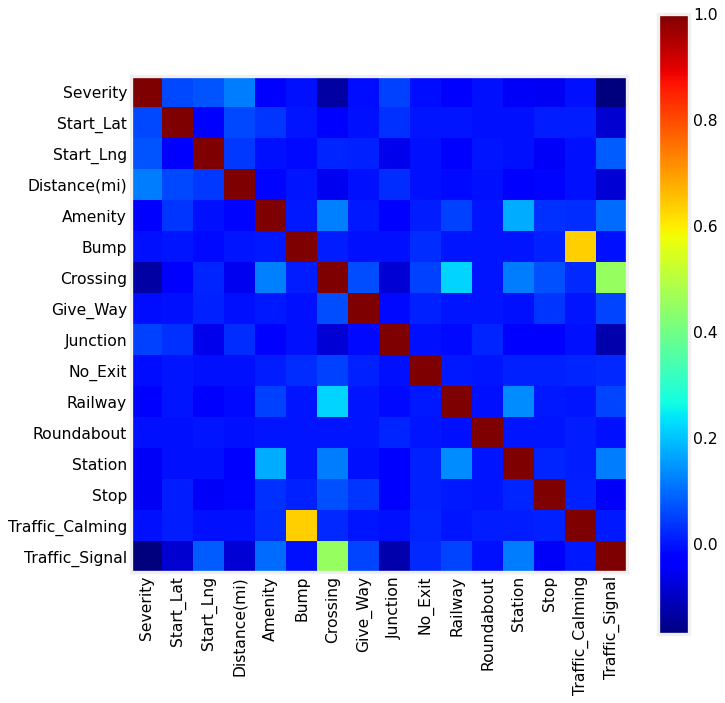

In [13]:
plotCorrelationMatrix(df, 10)

In [14]:
Sev_Ana = df.groupby('Severity').count()
Sev_Ana

,ID,Source,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Severity,,,,,,,,,,,,,,,,,,,,,
1,29312,29312,1134,29312,29312,29312,29312,28178,28178,29312,...,29312,29312,29312,29312,29312,29312,29309,29309,29309,29309
2,3006626,3006626,1794244,3006626,3006626,3006626,3006626,1212382,1212382,3006626,...,3006626,3006626,3006626,3006626,3006626,3006626,3006522,3006522,3006522,3006522
3,1072821,1072821,911769,1072821,1072821,1072821,1072821,161052,161052,1072821,...,1072821,1072821,1072821,1072821,1072821,1072821,1072807,1072807,1072807,1072807
4,123782,123782,9330,123782,123782,123782,123782,114452,114452,123782,...,123782,123782,123782,123782,123782,123782,123762,123762,123762,123762


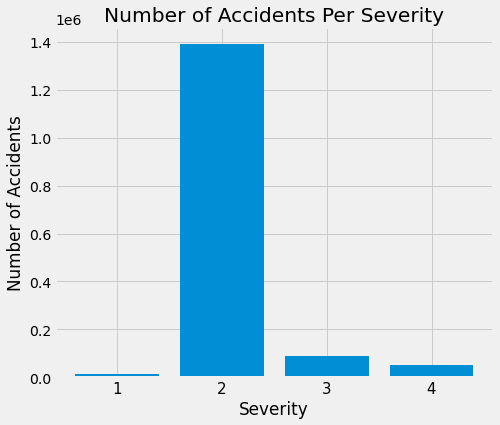

In [15]:
# Severity value counts 

plt.figure(figsize=(7, 6))
plt.title('Number of Accidents Per Severity')
plt.bar(Sev_Ana.index, Sev_Ana.Number)
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(Sev_Ana.index, size=15)
plt.show()

In [16]:
states = df.State.unique()
severity_1_by_state = []
severity_2_by_state = []
severity_3_by_state = []
severity_4_by_state = []
for i in states:
    severity_1_by_state.append(df[(df['Severity']==1)&(df['State']==i)].count()['ID'])
    severity_2_by_state.append(df[(df['Severity']==2)&(df['State']==i)].count()['ID'])
    severity_3_by_state.append(df[(df['Severity']==3)&(df['State']==i)].count()['ID'])
    severity_4_by_state.append(df[(df['Severity']==4)&(df['State']==i)].count()['ID'])



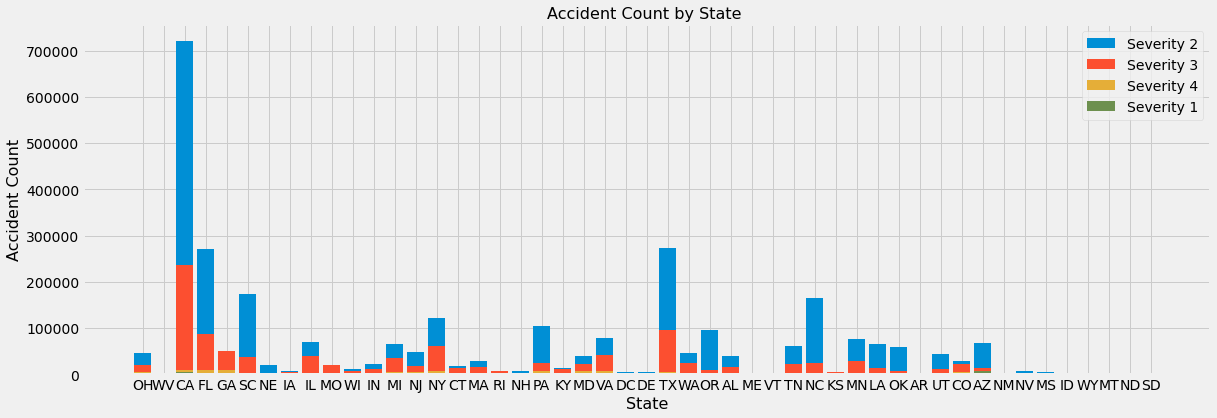

In [17]:
plt.figure(figsize=(18,6))

plt.bar(states, severity_2_by_state, label='Severity 2')
plt.bar(states, severity_3_by_state, label='Severity 3')
plt.bar(states, severity_4_by_state, label='Severity 4')
plt.bar(states, severity_1_by_state, label='Severity 1')
plt.title("Accident Count by State ", fontsize=16)
plt.xlabel("State", fontsize=16)
plt.ylabel("Accident Count", fontsize=16)


plt.legend()

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])


In [21]:
#Add Week_day column in the data.
df['weekday'] = df['Start_Time'].dt.weekday

#Add Month column in the data.
df['month'] = df['Start_Time'].dt.month


In [22]:
# Converting all the data with the weekday
Weekday = df.groupby('weekday').count()
Weekday

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,month
weekday,,,,,,,,,,,,,,,,,,,,,
0,703779,703779,467948,703779,703779,703779,703779,703779,235831,235831,...,703779,703779,703779,703779,703779,703755,703755,703755,703755,703779
1,744645,744645,493745,744645,744645,744645,744645,744645,250900,250900,...,744645,744645,744645,744645,744645,744618,744618,744618,744618,744645
2,747851,747851,492076,747851,747851,747851,747851,747851,255775,255775,...,747851,747851,747851,747851,747851,747820,747820,747820,747820,747851
3,742968,742968,484932,742968,742968,742968,742968,742968,258036,258036,...,742968,742968,742968,742968,742968,742952,742952,742952,742952,742968
4,747624,747624,493497,747624,747624,747624,747624,747624,254127,254127,...,747624,747624,747624,747624,747624,747595,747595,747595,747595,747624
5,289754,289754,152134,289754,289754,289754,289754,289754,137620,137620,...,289754,289754,289754,289754,289754,289744,289744,289744,289744,289754
6,255920,255920,132145,255920,255920,255920,255920,255920,123775,123775,...,255920,255920,255920,255920,255920,255916,255916,255916,255916,255920


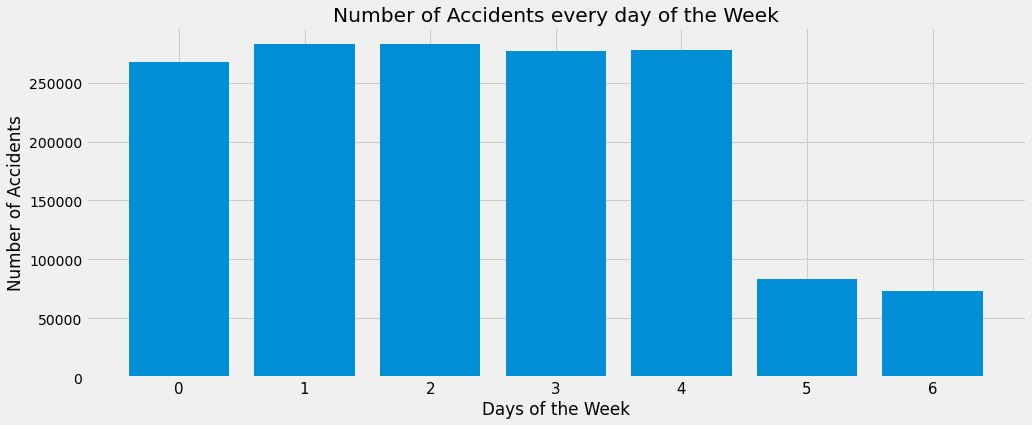

In [23]:
plt.figure(figsize=(15, 6))
plt.title('Number of Accidents every day of the Week')
plt.bar(Weekday.index, Weekday.Number)
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(Weekday.index, size=15)
plt.show()

In [24]:
# Converting all the data by month

Month = df.groupby('month').count()
Month

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,weekday
month,,,,,,,,,,,,,,,,,,,,,
1,301931,301931,213391,301931,301931,301931,301931,301931,88540,88540,...,301931,301931,301931,301931,301931,301921,301921,301921,301921,301931
2,284394,284394,201975,284394,284394,284394,284394,284394,82419,82419,...,284394,284394,284394,284394,284394,284389,284389,284389,284389,284394
3,293386,293386,196584,293386,293386,293386,293386,293386,96802,96802,...,293386,293386,293386,293386,293386,293371,293371,293371,293371,293386
4,299487,299487,192480,299487,299487,299487,299487,299487,107007,107007,...,299487,299487,299487,299487,299487,299477,299477,299477,299477,299487
5,296605,296605,188410,296605,296605,296605,296605,296605,108195,108195,...,296605,296605,296605,296605,296605,296597,296597,296597,296597,296605
6,310361,310361,197313,310361,310361,310361,310361,310361,113048,113048,...,310361,310361,310361,310361,310361,310348,310348,310348,310348,310361
7,258193,258193,204543,258193,258193,258193,258193,258193,53650,53650,...,258193,258193,258193,258193,258193,258185,258185,258185,258185,258193
8,326235,326235,263332,326235,326235,326235,326235,326235,62903,62903,...,326235,326235,326235,326235,326235,326226,326226,326226,326226,326235
9,381199,381199,258293,381199,381199,381199,381199,381199,122906,122906,...,381199,381199,381199,381199,381199,381189,381189,381189,381189,381199


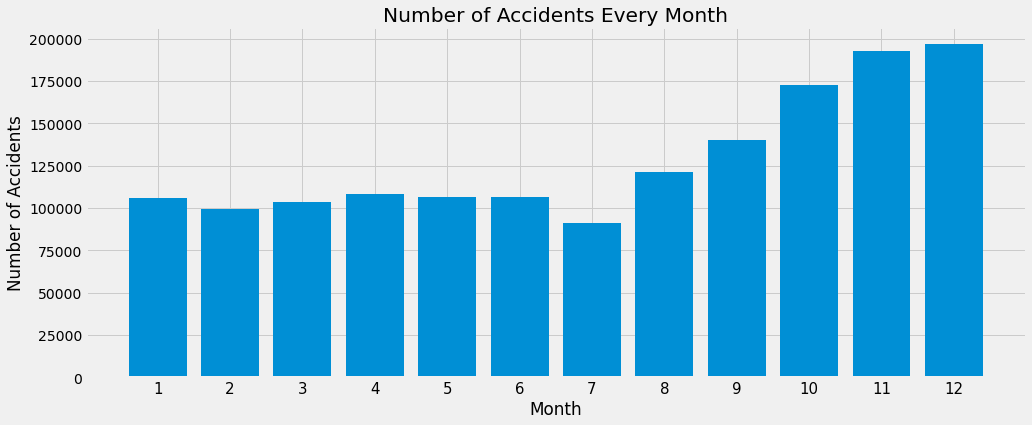

In [25]:
plt.figure(figsize=(15, 6))
plt.title('Number of Accidents Every Month')
plt.bar(Month.index, Month.Number)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(Month.index, size=15)
plt.show()